In [401]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import pandas_profiling
from pandas_profiling  import ProfileReport
import matplotlib.pyplot as plt

## Importing and cleaning data


In [402]:
#loading fundemetal/raw data set
pd.read_csv("../../data/raw/meteors.csv") 
df = pd.read_csv("../../data/raw/meteors.csv")
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [403]:
df.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


In [406]:
#filtering/wrangling
dc = (
    df.rename(columns={"name":"Name","nametype":"Classification","recclass": "Class","mass": "Mass", "fall": "FallType"})
    .sort_values("year", ascending=True)
    .dropna()
    .drop(['reclat', 'reclong'], axis=1)
         )
dc

,Name,id,Classification,Class,Mass,FallType,year,GeoLocation
38301,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601.0,"(49.416670, 21.700000)"
703,Nogata,16988,Valid,L6,472.0,Fell,860.0,"(33.725000, 130.750000)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,"(50.183330, 12.733330)"
852,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,"(45.483330, 9.516670)"
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,"(47.866670, 7.350000)"
...,...,...,...,...,...,...,...,...
30774,Northwest Africa 7858,57423,Valid,H4,459.0,Found,2013.0,"(0.000000, 0.000000)"
30776,Northwest Africa 7861,57425,Valid,L5,611.0,Found,2013.0,"(0.000000, 0.000000)"
30777,Northwest Africa 7862,57426,Valid,L4/5,317.0,Found,2013.0,"(0.000000, 0.000000)"
30759,Northwest Africa 7812,57258,Valid,Angrite,46.2,Found,2013.0,"(0.000000, 0.000000)"


In [411]:
#data frame containing latitude and longtidtude (separately)
dll = (df
    .rename(columns={"name":"Name","nametype":"Classification","recclass": "Class","mass": "Mass", "fall": "FallType", "reclat": "Latitude", "reclong":"Longtitude"})
    .dropna()
    .drop(['GeoLocation'], axis =1)
      )
dll

,Name,id,Classification,Class,Mass,FallType,year,Latitude,Longtitude
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460


### Definition of variables
- Name: name of  meteorite (usually a location, modified to fit its year, composition etc.)
- id: unique identifier of the meteorite
- Classification: defines the meteorite's condition
      -valid = a typical meteorite 
      -relict = a meteorite that has been significantly degrades by weather (on Earth)
- Class: class of the meteorite (based on physical, chemical and other characteristics)
- Mass: the mass of the meteorite (in grams)
- Fall Type: whether the meteorite was seen falling ot discovered after impact 
      -fell = the fall was observed
      -found = the fall was not observed
- Year: the year the meteorite fell, or was found (depending on the Fall Type value)
- GeoLocation: the latitude and longtitude of the meteorite's landing
            
            

Description of dataset:
This data set was created by NASA with data collected by The Meteoritical Society. It includes the name, unique identifier, classification, mass, year of impact and geographical location of found meteorites.
    
    

### Wrangling and sorting of data set

In [412]:
dc = (
    df.rename(columns={"name":"Name","nametype":"Classification","recclass": "Class","mass": "Mass", "fall": "FallType"})
    .sort_values("year", ascending=True)
    .dropna()
    .drop(['reclat', 'reclong'], axis=1)
         )
dc


,Name,id,Classification,Class,Mass,FallType,year,GeoLocation
38301,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601.0,"(49.416670, 21.700000)"
703,Nogata,16988,Valid,L6,472.0,Fell,860.0,"(33.725000, 130.750000)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,"(50.183330, 12.733330)"
852,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,"(45.483330, 9.516670)"
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,"(47.866670, 7.350000)"
...,...,...,...,...,...,...,...,...
30774,Northwest Africa 7858,57423,Valid,H4,459.0,Found,2013.0,"(0.000000, 0.000000)"
30776,Northwest Africa 7861,57425,Valid,L5,611.0,Found,2013.0,"(0.000000, 0.000000)"
30777,Northwest Africa 7862,57426,Valid,L4/5,317.0,Found,2013.0,"(0.000000, 0.000000)"
30759,Northwest Africa 7812,57258,Valid,Angrite,46.2,Found,2013.0,"(0.000000, 0.000000)"


In [413]:
dc.describe().T

,count,mean,std,min,25%,50%,75%,max
id,38116.0,25343.110557,17395.132894,1.0,10831.75,21732.50,39887.25,57458.0
Mass,38116.0,15600.306111,628673.503470,0.0,6.63,29.09,187.41,60000000.0
year,38116.0,1989.957472,26.444565,601.0,1986.00,1996.00,2002.00,2101.0


- It is interesting to see that there is a confident prediction of a meteorite hitting the Earth in 2101 and it's GeoLocation (not sure how accurate that it is though)

In [36]:
prof = ProfileReport(dc)
prof

Observations:
 - there is a large number of GeoLocations as (0,0), which were suggested to be dropped
 - the year is highly correlated with the fall type
 - there is a small variance in the Classification of state
 - there is a small variance in the Fall Type
 - there are 5 top classes that the meteorites can be classified in 
 - little missing values 

### 1) Year and mass correlation of large meteorites from the year 1700 and onwards

In [382]:
#create a more reasonable timeframe (of years)
dfy = (dc[dc.year>1800])

#drop the predicted meteorite impact
dff = dfy.drop([30679]) 

#exclude stony meteorites (mass < 250g)
dfm = (dff[dff.Mass>1000000]) 

#remove any invalid geolocations
dfgl = dfm[~dfm.GeoLocation.str.contains("0.000000")] 
dfgl

#begin numbering at 1
df = (dfgl
    .reset_index()
    .drop(columns=['index'])
     )
df 


,Name,id,Classification,Class,Mass,FallType,year,GeoLocation
0,Charcas,5326,Valid,"Iron, IIIAB",1400000.0,Found,1804.0,"(23.083330, -101.016670)"
1,Bitburg,5062,Valid,"Iron, IAB complex",1500000.0,Found,1805.0,"(49.966670, 6.533330)"
2,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818.0,"(76.133330, -64.933330)"
3,Gibeon,10912,Valid,"Iron, IVA",26000000.0,Found,1836.0,"(-25.500000, 18.000000)"
4,Coahuila,5387,Valid,"Iron, IIAB",2100000.0,Found,1837.0,"(28.700000, -102.733330)"
5,Chupaderos,5363,Valid,"Iron, IIIAB",24300000.0,Found,1852.0,"(27.000000, -105.100000)"
6,Cranbourne,5463,Valid,"Iron, IAB-MG",8600000.0,Found,1854.0,"(-38.100000, 145.300000)"
7,Vaca Muerta,24142,Valid,Mesosiderite-A1,3828000.0,Found,1861.0,"(-25.750000, -70.500000)"
8,Wabar,24194,Valid,"Iron, IIIAB",2550000.0,Found,1863.0,"(21.499720, 50.472220)"
9,Bacubirito,4919,Valid,"Iron, ungrouped",22000000.0,Found,1863.0,"(26.200000, -107.833330)"


source for dropping geolocations (https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p)

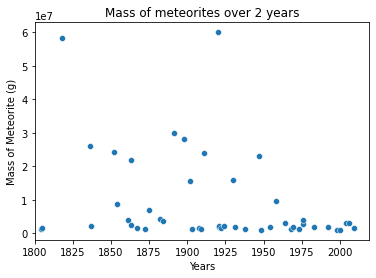

In [389]:
#plot mass vs year
sns.scatterplot(data=df, x='year', y="Mass")

plt.title ('Mass of meteorites over 2 years')
plt.ylabel("Mass of Meteorite (g)")
plt.xlabel("Years")
plt.xlim (1800)

plt.show()

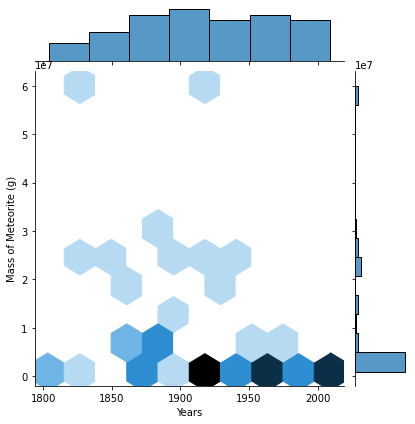

In [390]:
#plot mass vs year
sns.jointplot(data=dataYM, x="year", y="Mass", kind="hex",marginal_ticks=False)


plt.ylabel("Mass of Meteorite (g)")
plt.xlabel("Years")
plt.show()



#### Conclusion:
From the scatter plot, there is no trend in an increase of meteor mass with time. The meteor sizes seem to relativly all be the same size, which can be seen in both the scatter plot and hex plot. However, it does look like more meteorites have fallen between 1900-2013 than from 1800-1900.


### 1) GeoLocation and mass of meteorites over the years


In [414]:
#using the filtered dataframe from above
dll

,Name,id,Classification,Class,Mass,FallType,year,Latitude,Longtitude
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460


In [442]:
#making a plottable dataframe
data = dll.drop(columns=['id','Name', 'Classification','Mass', 'Class', 'FallType'])
dataG = (data[data.year>1900])
dataG
# data

,year,Latitude,Longtitude
1,1951.0,56.18333,10.23333
2,1952.0,54.21667,-113.00000
3,1976.0,16.88333,-99.90000
4,1902.0,-33.16667,-64.95000
5,1919.0,32.10000,71.80000
...,...,...,...
45711,1990.0,29.03700,17.01850
45712,1999.0,13.78333,8.96667
45713,1939.0,49.25000,17.66667
45714,2003.0,49.78917,41.50460


In [464]:
#plot mass vs year
# y1 = sns.scatterplot(data=data, x="year", y="Latitude")
# plt.xlim(1800)
# y2 = sns.scatterplot(data=data, x="year", y="Longtitude")
# plt.xlim(1800)


# plt.show()

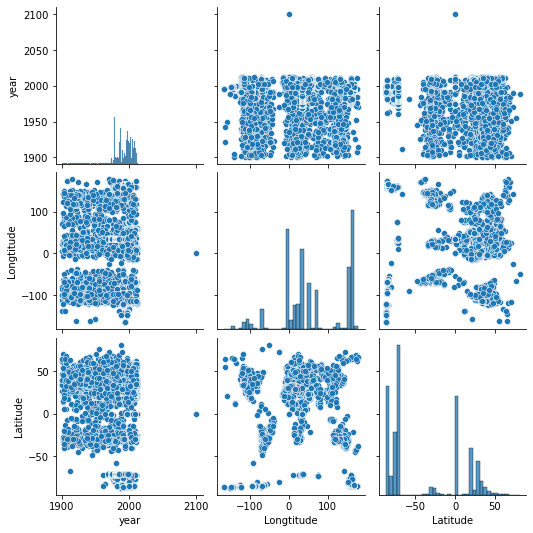

In [463]:
sns.pairplot(dataG[['year', 'Longtitude','Latitude']])

plt.show()

In [14]:
#attempted function creation 

# def data(path):
#     df2 = (
#     df.rename(columns={"name":"Name given","nametype":"Classification of state","recclass": "Class","mass": "Mass", "fall": "Fall Type"})
#     .dropna()
#     .drop(['reclat', 'reclong'], axis=1)
#       )
#     return df2


# def DataMass(path):
#     df3= (
#     df.rename(columns={"name":"Name given","nametype":"Classification of state","recclass": "Class","mass": "Mass", "fall": "Fall Type"})
#     .sort_values('Mass', ascending = True)
#     .drop(['reclat', 'reclong'], axis=1)
#     .dropna()
#         )
#     return df3


# def DataYear(path): 
#     df4 = (
#     df.rename(columns={"name":"Name given","nametype":"Classification of state","recclass": "Class","mass": "Mass", "fall": "Fall Type"})
#     .sort_values("year", ascending=True)
#     .drop(['reclat', 'reclong'], axis=1)
#     .dropna()
# )
#     return df4

# data(path)
# DataMass(path)
# DataYear(path)

In [10]:
# import sys

# sys.path.append('../..')

In [21]:
# from scripts import ProjectFunctions as pf

In [22]:
# path = ("../../data/raw/meteors.csv")

In [23]:
# ds = pf.data(path)